In [2]:
# import necessary modules
from classy import Class
from math import pi

In [3]:
#############################################
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842 ,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   'l_max_scalars':5000}
#
#
common_settings1 = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_m':0.134*1.1,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842 ,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   'l_max_scalars':5000}
#

#
common_settings2 = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499*1.1,
                   'tau_reio':0.05430842 ,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   'l_max_scalars':5000}
#

#
common_settings3 = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09*1.1,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842 ,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   'l_max_scalars':5000}
#

#
common_settings4 = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280*1.1,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842 ,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   'l_max_scalars':5000}
#

M = Class()
#
###############
#    
# call CLASS for the total Cl's and then for each contribution
#
###############
#
M.set(common_settings)
M.compute()
cl_tot = M.raw_cl(3000)
M.empty()           # reset input

# new input
M.set(common_settings1) # new input
M.compute()
cl_tot1 = M.raw_cl(3000)
M.empty() 

# new input
M.set(common_settings2) # new input
M.compute()
cl_tot2 = M.raw_cl(3000)
M.empty() 

# new input
M.set(common_settings3) # new input
M.compute()
cl_tot3 = M.raw_cl(3000)
M.empty() 

# new input
M.set(common_settings4) # new input
M.compute()
cl_tot4 = M.raw_cl(3000)
M.empty() 


In [4]:
# modules and settings for the plot
#
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

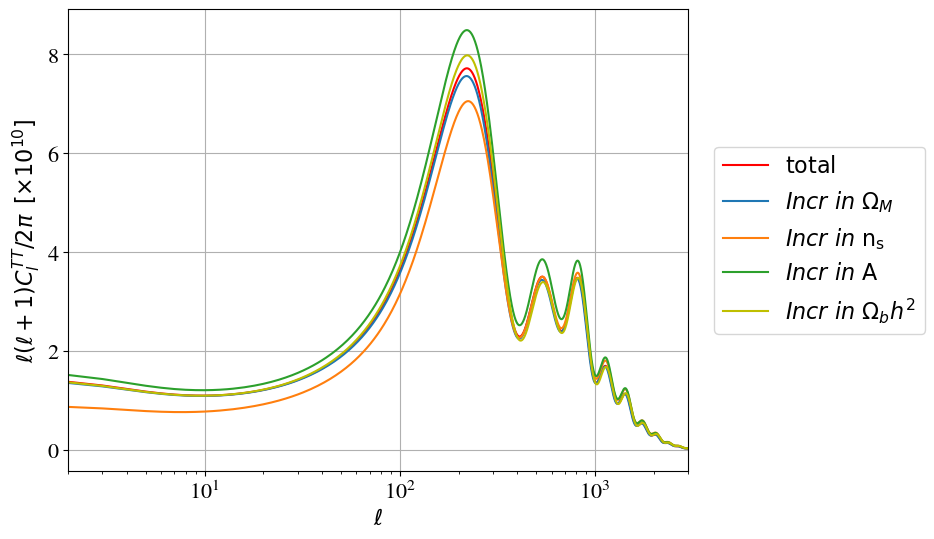

In [5]:
#################
#
# start plotting
#
#################
#
plt.xlim([2,3000])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
#
ell = cl_tot['ell']
ell1 = cl_tot1['ell']
ell2 = cl_tot2['ell']
ell3 = cl_tot3['ell']
ell4 = cl_tot4['ell']
factor = 1.e10*ell*(ell+1.)/2./pi
factor1 = ell*(ell+1.)/2./pi*(2.755e6)**2
#plt.semilogx(ell,factor*cl_tsw['tt'],'c-',label=r'$\mathrm{T+SW}$')
#plt.semilogx(ell,factor*cl_eisw['tt'],'r-',label=r'$\mathrm{early-ISW}$')
#plt.semilogx(ell,factor*cl_lisw['tt'],'y-',label=r'$\mathrm{late-ISW}$')
#plt.semilogx(ell,factor*cl_dop['tt'],'g-',label=r'$\mathrm{Doppler}$')
plt.semilogx(ell,factor*cl_tot['tt'],'r-',label=r'$\mathrm{total}$')
plt.semilogx(ell1,factor*cl_tot1['tt'],label=r'$Incr\ in\ \Omega_M$')
plt.semilogx(ell2,factor*cl_tot2['tt'],label=r'$Incr\ in\ \mathrm{n_s}$')
plt.semilogx(ell3,factor*cl_tot3['tt'],label=r'$Incr\ in\ \mathrm{A}$')
plt.semilogx(ell4,factor*cl_tot4['tt'],'y-',label=r'$Incr\ in\ \Omega_bh^2}$')
#plt.semilogx(ell,factor*cl_lensed['tt'],'k-',label=r'$\mathrm{lensed}$')
#
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

In [ ]:
# Increase in Omega_m results in a much lower initial peak that cooresponds to the sound horizon. This makes sense since a higher
# matter density would mean that the sound horizon peak in the cmb decreases

#Increase in spectral index means that smaller scale fluctuations enter in at earlier times and as a result we will see more cmb 
#power at smaller scales since the small sccale structures after inflation have had more time to grow. If we look at the 
#increase in n_s graph we see that the eaks at smaller scales are higher than the defualt and the peaks and values larger scales
#are less

#An increase in the amplitude of the primordial power spectrum would mean matter at all scales enters earlier and thus 
#the compressions at all scales would be increased as seen in the graph

#An increase in the physical baryon density means that there is an increase in baryons only while the potential wells created by 
#the cdm do not increase. Thus we can expect every other copression to be more which relate to the pressure being more since
#there is an increase in baryons